## Biomass and butyrate production in function of $o_2$ and $gluc$

found units here 

https://cnls.lanl.gov/external/qbio2018/Slides/FBA%202/qBio-FBA-lab-slides.pdf


- Growth Rate (1/h): 0.76
- Lycopene Production Rate (mmol/gdcw/h): 0.2496
- Lycopene Yield (mol/mol glucose): 0.02496


In [25]:
import cobra
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [26]:
cerevisiaeMod1 = cobra.io.load_json_model('./cerevisiaeMod1.json')
cerevisiaeMod1a = cobra.io.load_json_model('./cerevisiaeMod1a.json')
cerevisiaeMod2 = cobra.io.load_json_model('./cerevisiaeMod2.json')
cerevisiaeMod3 = cobra.io.load_json_model('./cerevisiaeMod3.json')

cerevisiaeMod1.objective = cerevisiaeMod1.add_boundary(cerevisiaeMod1.metabolites.but_c, type='demand')
cerevisiaeMod1a.objective = cerevisiaeMod1a.add_boundary(cerevisiaeMod1a.metabolites.but_c, type='demand')
cerevisiaeMod2.objective = cerevisiaeMod2.add_boundary(cerevisiaeMod2.metabolites.but_c, type='demand')
cerevisiaeMod3.objective = cerevisiaeMod3.add_boundary(cerevisiaeMod3.metabolites.but_c, type='demand')

In [66]:
copyTest = cerevisiaeMod1.copy()
copyTest.genes.phaA

Gene identifier,phaA
Name,phaA
Memory address,0x07dc46a0b38
Functional,True
In 1 reaction(s),ACACT1b


In [71]:
def o2Uptake(lam, model):
    '''
    Butyrate and biomass production in fucntion of the oxigen uptake.  
    
    inputs: lam: the tradeoff paremeter. 
            model: sacaromises model. 
           
    output:
     data: a dictionary with
                 o2 : array containing the oxigen uptake.
                 buts_o2 : array with butyrate production. 
                 biomasses_o2 : array with biomass produciton.
    '''
    
    biomass = model.reactions.BIOMASS_SC5_notrace.flux_expression
    
    but1 = model.reactions.DM_but_c.flux_expression

    modelCopy = model.copy()
    
    biomass_but = modelCopy.problem.Objective(biomass + lam*but1,
        direction='max')

    modelCopy.objective = biomass_but

    o2 = np.arange(0., 20., 0.5)
    no2 = len(o2)

    buts_o2 = np.repeat(0.0, no2)
    
    biomasses_o2 = np.repeat(0.0, no2)
    
    for i, o in enumerate(o2):

        modelCopy.reactions.EX_o2_e.lower_bound = -o
        modelCopy.reactions.EX_o2_e.upper_bound = -o
    
        solution = modelCopy.optimize(objective_sense=None)
        
        buts_o2[i] = solution.fluxes.DM_but_c
        
        biomasses_o2[i] = solution.fluxes.BIOMASS_SC5_notrace
        
    data = {'o2' : o2, 
            'buts_o2' : buts_o2, 'biomasses_o2' : biomasses_o2}
    
    return(data)

In [82]:
def gluUptake(lam, model):
    '''
    Butyrate and biomass production in fucntion of the glucose uptake.  
    
    inputs: lam: the tradeoff paremeter. 
            model: sacaromises model. 
           
    output: 
     data: a dictionary with
                 glu : array containing the glucose uptake.
                 buts_glu : array with butyrate production. 
                 biomasses_glu : array with biomass produciton.
    '''

    
    biomass = model.reactions.BIOMASS_SC5_notrace.flux_expression
    
    but1 = model.reactions.DM_but_c.flux_expression

    modelCopy = model.copy()
    
    biomass_but = modelCopy.problem.Objective(biomass + lam*but1,
        direction='max')

    modelCopy.objective = biomass_but

    glu = np.arange(7., 15., 0.5)
    noglu = len(glu)

    buts_glu = np.repeat(0.0, noglu)
    
    biomasses_glu = np.repeat(0.0, noglu)
    
    for i, g in enumerate(glu):

        modelCopy.reactions.EX_glc__D_e.lower_bound = -g
        modelCopy.reactions.EX_glc__D_e.upper_bound = -g
    
        solution = modelCopy.optimize(objective_sense=None)
        
        buts_glu[i] = solution.fluxes.DM_but_c
        
        biomasses_glu[i] = solution.fluxes.BIOMASS_SC5_notrace
        
    data = {'glu' : glu, 
            'buts_glu' : buts_glu, 'biomasses_glu' : biomasses_glu}
    
    return(data)

In [76]:
data002Mod1 = o2Uptake(lam=0.02, model=cerevisiaeMod1)
data002Mod1a = o2Uptake(lam=0.02, model=cerevisiaeMod1a)
data002Mod2 = o2Uptake(lam=0.02, model=cerevisiaeMod2)
data002Mod3 = o2Uptake(lam=0.02, model=cerevisiaeMod3)

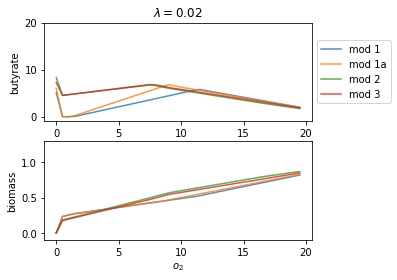

In [99]:
ax1 = plt.subplot(2, 1, 1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

a = 0.8
plt.plot(data002Mod1['o2'], data002Mod1['buts_o2'], label="mod 1", alpha=a)
plt.plot(data002Mod1a['o2'], data002Mod1a['buts_o2'], label="mod 1a", alpha=a)
plt.plot(data002Mod2['o2'], data002Mod2['buts_o2'], label="mod 2", alpha=a)
plt.plot(data002Mod3['o2'], data002Mod3['buts_o2'], label="mod 3", alpha=a)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(-1, 20)
plt.ylabel('butyrate')
plt.title('$\lambda = 0.02$')

plt.subplot(2, 1, 2)
plt.plot(data002Mod1['o2'], data002Mod1['biomasses_o2'], label="mod 1", alpha=a)
plt.plot(data002Mod1a['o2'], data002Mod1a['biomasses_o2'], label="mod 1a", alpha=a)
plt.plot(data002Mod2['o2'], data002Mod2['biomasses_o2'], label="mod 2", alpha=a)
plt.plot(data002Mod3['o2'], data002Mod3['biomasses_o2'], label="mod 3", alpha=a)

ax2 = plt.subplot(2, 1, 2)
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])

plt.ylim(-0.1, 1.3)
plt.ylabel('biomass')
plt.xlabel('$o_2$')

plt.savefig('oxigenUptake_lam002.png', format='png', dpi=500)
plt.show()

In [89]:
lam = 0.06
data006Mod1 = o2Uptake(lam=lam, model=cerevisiaeMod1)
data006Mod1a = o2Uptake(lam=lam, model=cerevisiaeMod1a)
data006Mod2 = o2Uptake(lam=lam, model=cerevisiaeMod2)
data006Mod3 = o2Uptake(lam=lam, model=cerevisiaeMod3)

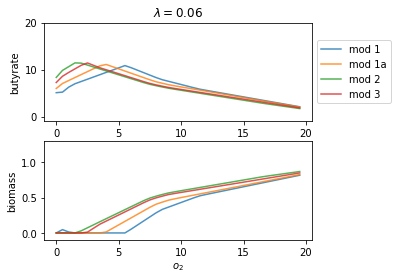

In [98]:
ax1 = plt.subplot(2, 1, 1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

a = 0.8
plt.plot(data006Mod1['o2'], data006Mod1['buts_o2'], label="mod 1",  alpha=a)
plt.plot(data006Mod1a['o2'], data006Mod1a['buts_o2'], label="mod 1a", alpha=a)
plt.plot(data006Mod2['o2'], data006Mod2['buts_o2'], label="mod 2", alpha=a)
plt.plot(data006Mod3['o2'], data006Mod3['buts_o2'], label="mod 3", alpha=a)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(-1, 20)
plt.ylabel('butyrate')
plt.title('$\lambda = 0.06$')

plt.subplot(2, 1, 2)
plt.plot(data006Mod1['o2'], data006Mod1['biomasses_o2'], label="mod 1",  alpha=a)
plt.plot(data006Mod1a['o2'], data006Mod1a['biomasses_o2'], label="mod 1a",  alpha=a)
plt.plot(data006Mod2['o2'], data006Mod2['biomasses_o2'], label="mod 2",  alpha=a)
plt.plot(data006Mod3['o2'], data006Mod3['biomasses_o2'], label="mod 3",  alpha=a)

ax2 = plt.subplot(2, 1, 2)
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])

plt.ylim(-0.1, 1.3)
plt.ylabel('biomass')
plt.xlabel('$o_2$')

plt.savefig('oxigenUptake_lam006.png', format='png', dpi=500)
plt.show()

In [83]:
lam = 0.02
data002gluMod1 = gluUptake(lam = lam, model = cerevisiaeMod1)
data002gluMod1a = gluUptake(lam = lam, model = cerevisiaeMod1a)
data002gluMod2 = gluUptake(lam = lam, model = cerevisiaeMod2)
data002gluMod3 = gluUptake(lam = lam, model = cerevisiaeMod3)

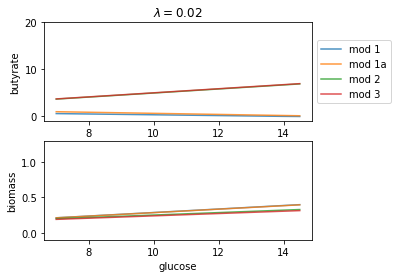

In [97]:
ax1 = plt.subplot(2, 1, 1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

a = 0.8
plt.plot(data002gluMod1['glu'], data002gluMod1['buts_glu'], label="mod 1", alpha=a)
plt.plot(data002gluMod1a['glu'], data002gluMod1a['buts_glu'], label="mod 1a", alpha=a)
plt.plot(data002gluMod2['glu'], data002gluMod2['buts_glu'], label="mod 2", alpha=a)
plt.plot(data002gluMod3['glu'], data002gluMod3['buts_glu'], label="mod 3", alpha=a)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(-1, 20)
plt.ylabel('butyrate')
plt.title('$\lambda = 0.02$')

ax2 = plt.subplot(2, 1, 2)
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])

plt.plot(data002gluMod1['glu'], data002gluMod1['biomasses_glu'], label="mod 1", alpha=a)
plt.plot(data002gluMod1a['glu'], data002gluMod1a['biomasses_glu'], label="mod 1a", alpha=a)
plt.plot(data002gluMod2['glu'], data002gluMod2['biomasses_glu'], label="mod 2", alpha=a)
plt.plot(data002gluMod3['glu'], data002gluMod3['biomasses_glu'], label="mod 3", alpha=a)

plt.ylim(-0.1, 1.3)
plt.ylabel('biomass')
plt.xlabel('glucose')

plt.savefig('glucoseUptake_lam002.png', format='png', dpi=500)
plt.show()

In [87]:
lam = 0.06
data006gluMod1 = gluUptake(lam = lam, model = cerevisiaeMod1)
data006gluMod1a = gluUptake(lam = lam, model = cerevisiaeMod1a)
data006gluMod2 = gluUptake(lam = lam, model = cerevisiaeMod2)
data006gluMod3 = gluUptake(lam = lam, model = cerevisiaeMod3)

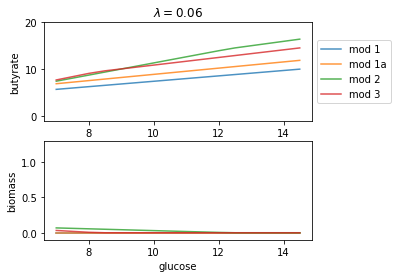

In [96]:
ax1 = plt.subplot(2, 1, 1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

a = 0.8
plt.plot(data006gluMod1['glu'], data006gluMod1['buts_glu'], label="mod 1", alpha=a)
plt.plot(data006gluMod1a['glu'], data006gluMod1a['buts_glu'], label="mod 1a", alpha=a)
plt.plot(data006gluMod2['glu'], data006gluMod2['buts_glu'], label="mod 2", alpha=a)
plt.plot(data006gluMod3['glu'], data006gluMod3['buts_glu'], label="mod 3", alpha=a)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(-1, 20)
plt.ylabel('butyrate')
plt.title('$\lambda = 0.06$')

ax2 = plt.subplot(2, 1, 2)
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])

plt.plot(data006gluMod1['glu'], data006gluMod1['biomasses_glu'], label="mod 1", alpha=a)
plt.plot(data006gluMod1a['glu'], data006gluMod1a['biomasses_glu'], label="mod 1a", alpha=a)
plt.plot(data006gluMod2['glu'], data006gluMod2['biomasses_glu'], label="mod 2", alpha=a)
plt.plot(data006gluMod3['glu'], data006gluMod3['biomasses_glu'], label="mod 3", alpha=a)

plt.ylim(-0.1, 1.3)
plt.ylabel('biomass')
plt.xlabel('glucose')

plt.savefig('glucoseUptake_lam006.png', format='png', dpi=500)
plt.show()

# Single genes deletion

In [86]:
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

In [95]:
SGD1 = single_gene_deletion(cerevisiaeMod1, return_frame=True)
SGD1a = single_gene_deletion(cerevisiaeMod1a, return_frame=True)
SGD2 = single_gene_deletion(cerevisiaeMod2, return_frame=True)
SGD3 = single_gene_deletion(cerevisiaeMod3, return_frame=True)

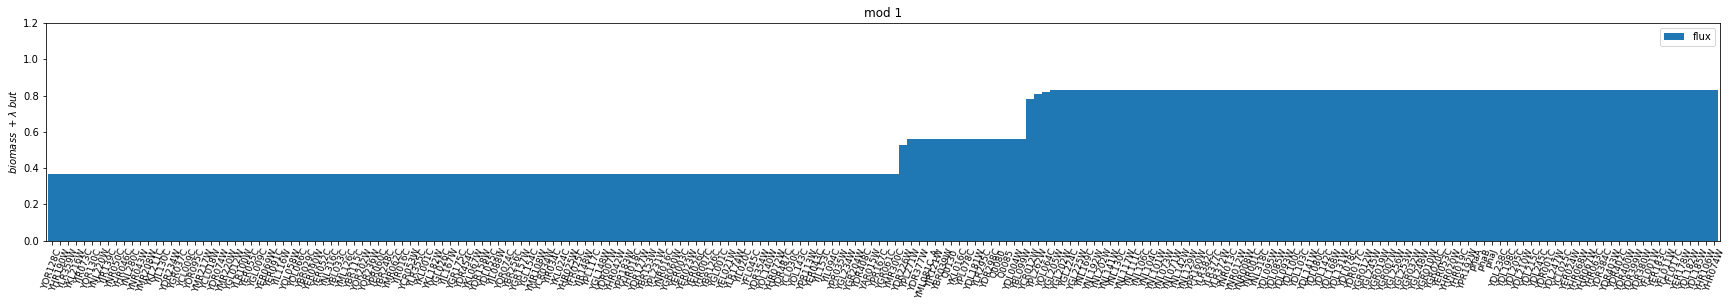

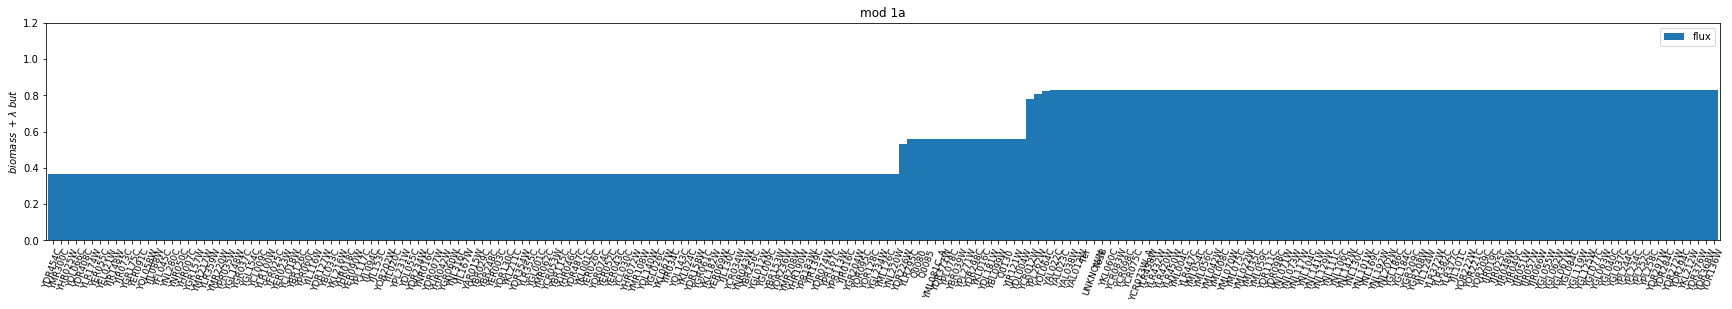

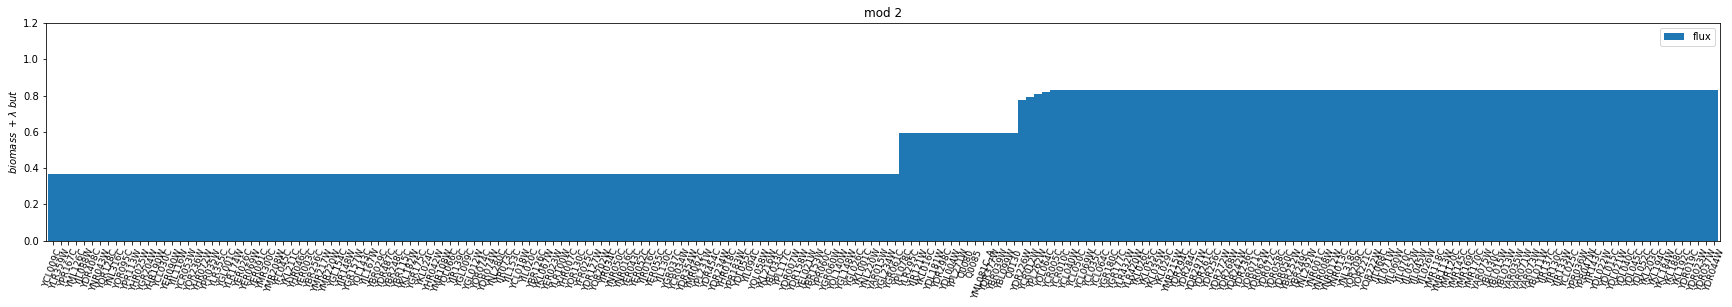

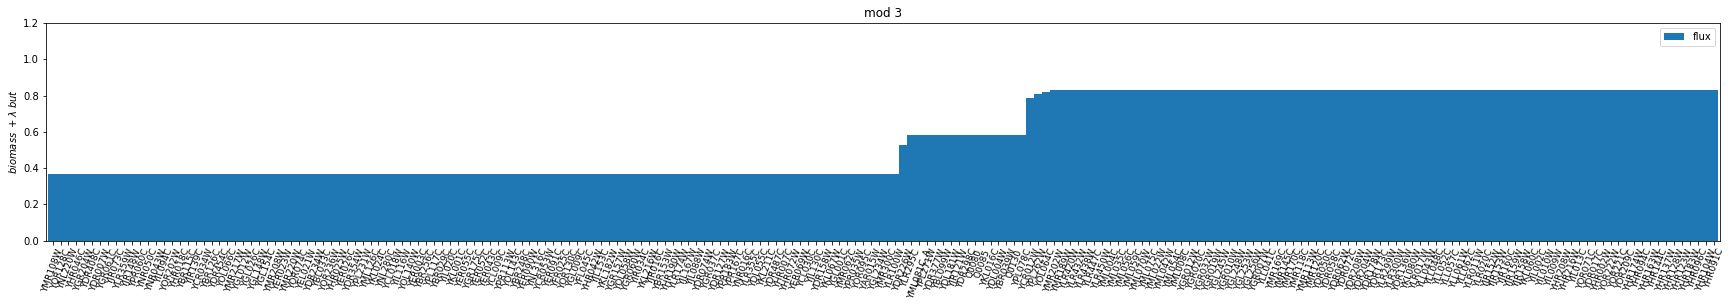

In [88]:
SGD1.sort_values(by='flux', ascending=True).head(210).plot.bar(width=1, figsize=(30, 4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70, fontsize = 9)
plt.ylim(0, 1.2)
plt.title('mod 1')
plt.ylabel('$biomass \  + \lambda \ but$')

SGD1a.sort_values(by='flux', ascending=True).head(210).plot.bar(width=1.1, figsize=(30, 4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70, fontsize = 9)
plt.ylim(0, 1.2)
plt.title('mod 1a')
plt.ylabel('$biomass \  + \lambda \ but$')

SGD2.sort_values(by='flux', ascending=True).head(210).plot.bar(width=1.1, figsize=(30, 4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70, fontsize = 9)
plt.ylim(0, 1.2)
plt.title('mod 2')
plt.ylabel('$biomass \  + \lambda \ but$')

SGD3.sort_values(by='flux', ascending=True).head(210).plot.bar(width=1.1, figsize=(30, 4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70, fontsize = 9)
plt.ylim(0, 1.2)
plt.title('mod 3')
plt.ylabel('$biomass \  + \lambda \ but$')

plt.show()